## **Pendahuluan**

**Problem Statement**  

Analisis Kepribadian Pelanggan adalah analisis mendalam tentang pelanggan ideal sebuah perusahaan. Hal ini membantu bisnis untuk lebih memahami pelanggannya dan mempermudah mereka dalam menyesuaikan produk sesuai dengan kebutuhan, perilaku, dan kekhawatiran spesifik dari berbagai jenis pelanggan.  

Analisis kepribadian pelanggan membantu bisnis dalam menyesuaikan produknya berdasarkan pelanggan target dari berbagai segmen pelanggan. Sebagai contoh, daripada menghabiskan dana untuk memasarkan produk baru kepada setiap pelanggan dalam basis data perusahaan, perusahaan dapat menganalisis segmen pelanggan mana yang paling mungkin membeli produk tersebut dan memasarkan produk hanya kepada segmen tertentu itu.

**Goal**

Dalam proyek ini, kami akan melakukan pengelompokan data tanpa pengawasan (unsupervised clustering) pada catatan pelanggan dari basis data sebuah perusahaan grosir menggunakan algoritma Agglomerative Clustering dengan metode average linkage. Segmentasi pelanggan adalah praktik memisahkan pelanggan ke dalam kelompok yang mencerminkan kesamaan di antara pelanggan dalam setiap kluster. Kami akan membagi pelanggan ke dalam segmen untuk mengoptimalkan nilai penting setiap pelanggan bagi bisnis. Tujuannya adalah untuk menyesuaikan produk sesuai dengan kebutuhan dan perilaku pelanggan yang berbeda. Hal ini juga membantu bisnis dalam menangani kebutuhan berbagai jenis pelanggan.

Dataset yang digunakan berasal dari Kaggle yang dapat ditemukan pada link berikut: [Sumber](https://www.kaggle.com/imakash3011/customer-personality-analysis)

In [122]:
# ignore warning prompts from the kernel
import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter('ignore')

# import the data
import pandas as pd

data = pd.read_csv(
    filepath_or_buffer='marketing_campaign.csv',
    sep='\t'
)

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Atribut-Atribut

**People**  
- **ID**: Identifikasi unik pelanggan  
- **Year_Birth**: Tahun kelahiran pelanggan  
- **Education**: Tingkat pendidikan pelanggan  
- **Marital_Status**: Status pernikahan pelanggan  
- **Income**: Pendapatan tahunan rumah tangga pelanggan  
- **Kidhome**: Jumlah anak kecil di rumah pelanggan  
- **Teenhome**: Jumlah remaja di rumah pelanggan  
- **Dt_Customer**: Tanggal pendaftaran pelanggan ke perusahaan  
- **Recency**: Jumlah hari sejak pembelian terakhir pelanggan  
- **Complain**: 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak  

**Products**  
- **MntWines**: Total pengeluaran untuk anggur dalam 2 tahun terakhir  
- **MntFruits**: Total pengeluaran untuk buah-buahan dalam 2 tahun terakhir  
- **MntMeatProducts**: Total pengeluaran untuk daging dalam 2 tahun terakhir  
- **MntFishProducts**: Total pengeluaran untuk ikan dalam 2 tahun terakhir  
- **MntSweetProducts**: Total pengeluaran untuk makanan manis dalam 2 tahun terakhir  
- **MntGoldProds**: Total pengeluaran untuk emas dalam 2 tahun terakhir  

**Promotion**  
- **NumDealsPurchases**: Jumlah pembelian dengan diskon  
- **AcceptedCmp1**: 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak  
- **AcceptedCmp2**: 1 jika pelanggan menerima penawaran pada kampanye kedua, 0 jika tidak  
- **AcceptedCmp3**: 1 jika pelanggan menerima penawaran pada kampanye ketiga, 0 jika tidak  
- **AcceptedCmp4**: 1 jika pelanggan menerima penawaran pada kampanye keempat, 0 jika tidak  
- **AcceptedCmp5**: 1 jika pelanggan menerima penawaran pada kampanye kelima, 0 jika tidak  
- **Response**: 1 jika pelanggan menerima penawaran pada kampanye terakhir, 0 jika tidak  

**Place**  
- **NumWebPurchases**: Jumlah pembelian melalui situs web perusahaan  
- **NumCatalogPurchases**: Jumlah pembelian menggunakan katalog  
- **NumStorePurchases**: Jumlah pembelian langsung di toko  
- **NumWebVisitsMonth**: Jumlah kunjungan ke situs web perusahaan dalam satu bulan terakhir


Selanjutnya, kami akan membuat ringkasan informasi tentang kolom dalam dataset untuk membantu eksplorasi awal data (Exploratory Data Analysis) dan mengidentifikasi masalah seperti nilai hilang atau tipe data yang tidak sesuai.

In [123]:
def get_data_summary(data):
    # get all values in the designated column to check its information
    items = [
        [
            column, 
            data[column].dtype, 
            data[column].nunique(), 
            list(data[column].unique()[:5]),
            data[column].isnull().sum(),
            round(
                number=data[column].isnull().sum() / data.shape[0],
                ndigits=2
            )
        ] for column in data
    ]

    # get the data information into a table
    return pd.DataFrame(
        data=items,
        columns=[
            'Column',
            'Type',
            'N Unique',
            'Unique Sample',
            'Missing',
            'Missing (%)'
        ]
    )

get_data_summary(data=data)

,Column,Type,N Unique,Unique Sample,Missing,Missing (%)
0,ID,int64,2240,"[5524, 2174, 4141, 6182, 5324]",0,0.00
1,Year_Birth,int64,59,"[1957, 1954, 1965, 1984, 1981]",0,0.00
2,Education,object,5,"[Graduation, PhD, Master, Basic, 2n Cycle]",0,0.00
3,Marital_Status,object,8,"[Single, Together, Married, Divorced, Widow]",0,0.00
4,Income,float64,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0]",24,0.01
5,Kidhome,int64,3,"[0, 1, 2]",0,0.00
6,Teenhome,int64,3,"[0, 1, 2]",0,0.00
7,Dt_Customer,object,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201...",0,0.00
8,Recency,int64,100,"[58, 38, 26, 94, 16]",0,0.00
9,MntWines,int64,776,"[635, 11, 426, 173, 520]",0,0.00


## **Data Pre-processing**
### Menangani Missing Values, Perubahan Tipe Data, dan Pemeriksaan Duplikat

1. **Menangani Missing Values pada Kolom `Income`**  
   Setelah melakukan eksplorasi data, ditemukan bahwa kolom `Income` memiliki data yang hilang dengan proporsi sebesar **0.01%** dari total data. Proporsi ini sangat kecil dan dianggap tidak signifikan, sehingga diputuskan untuk **menghapus baris yang memiliki nilai hilang** pada kolom `Income`. Keputusan ini diambil untuk memastikan analisis data tidak terpengaruh oleh nilai kosong, dan karena jumlah yang dihapus sangat kecil, dampaknya terhadap hasil keseluruhan dapat diabaikan.

2. **Perubahan Tipe Data Kolom `Dt_Customer`**  
   Kolom `Dt_Customer`, yang berisi tanggal pendaftaran pelanggan, awalnya disimpan dalam bentuk string. Untuk mendukung analisis berbasis waktu (seperti menghitung durasi sejak pendaftaran atau mengelompokkan data berdasarkan tahun atau bulan), tipe data kolom ini diubah menjadi **datetime** menggunakan fungsi `pd.to_datetime`. Hal ini memungkinkan pemrosesan yang lebih mudah dan akurat terkait data waktu.

3. **Pemeriksaan Duplikat pada Kolom `ID`**  
   Kolom `ID` merupakan **identifier unik** untuk setiap pelanggan. Oleh karena itu, kami melakukan pemeriksaan untuk memastikan tidak ada nilai duplikat pada kolom ini. Duplikat pada kolom `ID` dapat menyebabkan ketidakkonsistenan dalam analisis. Jika ditemukan, baris duplikat akan dihapus menggunakan fungsi `duplicated()` untuk menjaga integritas data.

In [124]:
# drop the row with missing values
data.dropna(inplace=True)

# convert the column in datetime type
data['Dt_Customer'] = pd.to_datetime(
    arg=data['Dt_Customer'],
    dayfirst=True
)

data['ID'].duplicated().sum()

0

### Segmentasi Kolom `Education`

In [125]:
data['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Pada tahap eksplorasi data, kita melihat distribusi nilai pada kolom `Education` yang berisi informasi tingkat pendidikan pelanggan. Berdasarkan hasil `value_counts()`, kita menemukan adanya lima kategori tingkat pendidikan yang berbeda.

Untuk mempermudah analisis lebih lanjut dan memberikan insight yang lebih jelas terkait segmentasi pendidikan, kolom `Education` dibagi menjadi **tiga kelompok utama** berdasarkan tingkat pendidikan secara umum:
1. **Undergraduate**: Untuk kategori `Basic` dan `2n Cycle`, yang dianggap sebagai pendidikan dasar atau tingkat sarjana awal.
2. **Graduate**: Untuk kategori `Graduation`, yang merujuk pada lulusan sarjana.
3. **Postgraduate**: Untuk kategori `Master` dan `PhD`, yang merujuk pada pendidikan pascasarjana.

In [126]:
# segmenting education levels into three groups
data['EducationLevel'] = data['Education'].replace(
    to_replace={
        'Basic':'Undergraduate',
        '2n Cycle':'Undergraduate', 
        'Graduation':'Graduate', 
        'Master':'Postgraduate', 
        'PhD':'Postgraduate'
    }
)

### Analisis Status Pernikahan dan Situasi Kehidupan Pelanggan

In [127]:
data['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Pada kolom `Marital_Status`, kita melihat berbagai kategori status pernikahan dan hubungan pelanggan.

Untuk mempermudah pemahaman dan analisis lebih lanjut terkait status hubungan, kita membuat fitur baru **`IsLivingWithPartner`** yang mengindikasikan apakah pelanggan **hidup bersama pasangan** atau tidak, dengan menggunakan kolom `Marital_Status`.

Selain status hubungan, kita juga membuat kolom baru **`IsParent`** untuk menentukan apakah pelanggan memiliki anak. Kolom ini dihasilkan berdasarkan dua kolom lainnya, yaitu `Kidhome` dan `Teenhome` yang menunjukkan jumlah anak-anak dan remaja yang tinggal di rumah pelanggan.

In [128]:
# deriving living situation by marital status
data['IsLivingWithPartner'] = data['Marital_Status'].apply(func=lambda x: 1 if (x == 'Married') | (x == 'Together') else 0)

# feature pertaining parenthood
import numpy as np

data['IsParent'] = np.where((data['Kidhome'] > 0) | (data['Teenhome']) > 0, 1, 0)

### Pembuatan Fitur Baru melalui Agregasi Kolom

Untuk meningkatkan kualitas analisis dan memahami perilaku pelanggan lebih dalam, beberapa fitur baru dibuat dengan melakukan agregasi terhadap beberapa kolom yang ada. Fitur-fitur ini memberikan gambaran yang lebih holistik mengenai anggota keluarga, pengeluaran, pembelian, dan partisipasi dalam kampanye pelanggan.

Langkah-langkah yang dilakukan:
- Menambahkan kolom **`FamilySize`** berdasarkan jumlah anggota keluarga (termasuk pasangan dan anak).
- Menambahkan kolom **`TotalSpent`** yang menghitung total pengeluaran pelanggan pada berbagai produk.
- Menambahkan kolom **`TotalPurchases`** yang menghitung total pembelian pelanggan di berbagai saluran.
- Menambahkan kolom **`TotalAcceptedCampaigns`** yang menghitung jumlah kampanye yang diterima pelanggan.

Fitur-fitur baru ini memberikan wawasan lebih lanjut tentang perilaku dan karakteristik pelanggan, yang akan sangat berguna dalam proses analisis atau pemodelan selanjutnya.

In [129]:
# column for total members in the household
def family_size(columns):
    size = 0
    size += 1 if columns['IsLivingWithPartner'] == 0 else 2
    
    return size + columns['Kidhome'] + columns['Teenhome']

data['FamilySize'] = data[['IsLivingWithPartner', 'Kidhome', 'Teenhome']].apply(
    func=family_size,
    axis=1
)

# total spendings on various items
item_columns = [column for column in data.columns if column.startswith('Mnt')]
data['TotalSpent'] = data[item_columns].sum(axis=1)

# total purchases excluding `NumDealsPurchases`
purchases = [column for column in data.columns if column.endswith('Purchases')][1:]
data['TotalPurchases'] = data[purchases].sum(axis=1)

# total campaigns accepted
campaigns = [column for column in data.columns if column.startswith('Accepted')]
campaigns.append('Response')
data['TotalAcceptedCampaigns'] = data[campaigns].sum(axis=1)

### Menemukan Informasi Lamanya Pelanggan Terdaftar

Untuk menentukan lamanya pelanggan terdaftar, kita perlu menentukan acuan tanggal yang digunakan sebagai referensi. Karena tidak ada acuan tanggal yang langsung ditemukan dalam dataset, kita bisa memanfaatkan kolom `Dt_Customer` untuk mencari rentang tanggal pendaftaran (tanggal minimum dan maksimum).

In [130]:
print('Registration Date:')
print('The first one = {}'.format(str(data['Dt_Customer'].min())))
print('The last one = {}'.format(str(data['Dt_Customer'].max())))

Registration Date:
The first one = 2012-07-30 00:00:00
The last one = 2014-06-29 00:00:00


In [131]:
(data['Dt_Customer'].max() - data['Dt_Customer'].min()).days

699

Setelah mengecek kolom `Dt_Customer`, ditemukan bahwa rentang tanggal pendaftaran pelanggan adalah **699 hari** atau hampir **2 tahun**, dengan tanggal pendaftaran pertama pada **30 Juli 2012** dan tanggal pendaftaran terakhir pada **29 Juni 2014**.

In [132]:
registered_interval = data['Dt_Customer'].sort_values().diff().dt.days

print("Interval days of customers' registration:")
print('Maximum interval = {}'.format(registered_interval.max()))
print('Mean interval = {}'.format(registered_interval.mean()))

Interval days of customers' registration:
Maximum interval = 3.0
Mean interval = 0.31557562076749435


Selain itu, kami juga menganalisis interval antar pendaftaran pelanggan, dengan hasil bahwa nilai **mean** intervalnya adalah sekitar **0.3 hari**. Rentang interval maksimal antar pendaftaran adalah **3 hari**. Ini menunjukkan bahwa pendaftaran pelanggan terjadi dalam waktu yang sangat rapat, dengan rata-rata selisih pendaftaran antar pelanggan hanya sekitar setengah hari.

Berdasarkan temuan ini, dapat diprediksi bahwa perekaman data dihentikan setelah tanggal pendaftaran terakhir, yaitu **29 Juni 2014**. Oleh karena itu, kami berasumsi bahwa perekaman data dihentikan pada **30 Juni 2014** sebagai penanda awal dari siklus kuartal kedua (Q2) dalam setahun.

In [133]:
# get the total registered days for each customer
end_date = pd.to_datetime(
    arg='30-06-2014',
    dayfirst=True
)

data['DaysRegistered'] = data['Dt_Customer'].apply(func=lambda x: (end_date - x).days)

### Kategori Usia Pelanggan Berdasarkan Tanggal Akhir

Tujuan utama dari pembuatan kategori usia ini adalah untuk membuat kolom usia lebih berguna dan lebih mudah direpresentasikan dalam analisis lebih lanjut. Dengan mengelompokkan usia pelanggan ke dalam kategori yang lebih luas, kita dapat lebih mudah mengidentifikasi pola atau tren dalam data.

Sebagai contoh, daripada menganalisis usia pelanggan secara langsung, yang mungkin memiliki rentang yang sangat lebar, kita dapat melihat bagaimana setiap kategori usia berperilaku dalam konteks pembelian atau preferensi produk. Kategori usia seperti **Gen Z**, **Young Professionals**, atau **Retirees** lebih mudah untuk dipahami dan lebih bermanfaat dalam pengambilan keputusan bisnis atau pemasaran yang lebih terfokus.

Selain itu, kategori usia ini juga memudahkan visualisasi data, karena kelompok yang lebih kecil membuat perbandingan antar segmen menjadi lebih jelas. Ini juga membantu dalam segmentasi pasar, sehingga perusahaan dapat menyesuaikan penawaran produk atau promosi yang lebih relevan dengan masing-masing kelompok usia tersebut.

In [134]:
# age of customer category by the time of end date
data['Age'] = end_date.year - data['Year_Birth']

# create a customer age category
data['AgeCategory'] = pd.cut(
    x=data['Age'],
    bins=[data['Age'].min()-1, 24, 34, 44, 54, 64, data['Age'].max()+1],
    labels=['Gen Z', 'Young Professionals', 'Older Millenials', 'Late Gen X', 'Early Retirees', 'Retirees']
)

data.drop(
    labels=['Year_Birth'],
    axis=1,
    inplace=True
)

Langkah-langkah ini bertujuan untuk memperjelas nama kolom dengan merename beberapa kolom yang lebih deskriptif dan menghapus kolom-kolom yang redundan atau tidak relevan untuk analisis lebih lanjut.

In [135]:
# for clarity
data = data.rename(columns={'MntGoldProds': 'MntGold'})

renamed_columns = [column for column in data.columns if column.startswith('Num') | column.startswith('Mnt')]

for column in renamed_columns:
    data=data.rename(columns={column: column[3:]})

renamed_columns = [column for column in data.columns if column.endswith('Products')]

for column in renamed_columns:
    data=data.rename(columns={column: column[:-8]})

# dropping some of the renamed or redundant columns
columns_to_drop = ['Education', 'Marital_Status', 'Z_CostContact', 'Z_Revenue', 'ID', 'Age', 'Dt_Customer'] + campaigns

data.drop(
    columns=columns_to_drop,
    axis=1,
    inplace=True
)

Langkah ini bertujuan untuk menyusun ulang kolom-kolom data sesuai dengan urutan yang lebih terstruktur dan sesuai dengan tujuan analisis, serta mempermudah dalam memperoleh ringkasan data dengan menyajikan informasi terkait kolom-kolom yang relevan seperti yang tertera pada bagian atribut data.

In [136]:
designated_column_arrangement = [
    'DaysRegistered', 'EducationLevel', 'Income', 'AgeCategory',
    'IsLivingWithPartner', 'IsParent', 'Kidhome', 'Teenhome', 'FamilySize',
    'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'TotalPurchases', 'DealsPurchases', 'TotalAcceptedCampaigns', 'WebVisitsMonth', 'Recency',
    'Fish', 'Fruits', 'Gold', 'Meat', 'Sweet', 'Wines', 'TotalSpent',
    'Complain'
]

data = data[designated_column_arrangement]

get_data_summary(data=data)

,Column,Type,N Unique,Unique Sample,Missing,Missing (%)
0,DaysRegistered,int64,662,"[664, 114, 313, 140, 162]",0,0.0
1,EducationLevel,object,3,"[Graduate, Postgraduate, Undergraduate]",0,0.0
2,Income,float64,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0]",0,0.0
3,AgeCategory,category,6,"[Early Retirees, Late Gen X, Young Professiona...",0,0.0
4,IsLivingWithPartner,int64,2,"[0, 1]",0,0.0
5,IsParent,int32,2,"[0, 1]",0,0.0
6,Kidhome,int64,3,"[0, 1, 2]",0,0.0
7,Teenhome,int64,3,"[0, 1, 2]",0,0.0
8,FamilySize,int64,5,"[1, 3, 2, 4, 5]",0,0.0
9,WebPurchases,int64,15,"[8, 1, 2, 5, 6]",0,0.0


### Deskripsi Data dan Perubahan Tipe Data

Pada langkah ini, kami membuat salinan dari data asli untuk keperluan deskripsi data lebih lanjut tanpa mengubah data asli. Kami memutuskan untuk mengubah tipe data beberapa kolom, yang berisi data numerik tetapi lebih tepat diperlakukan sebagai data ordinal, menjadi tipe `category`. Kolom-kolom yang dimaksud antara lain:

- **IsLivingWithPartner**: Menyatakan apakah pelanggan tinggal bersama pasangan atau tidak.
- **IsParent**: Menyatakan apakah pelanggan memiliki anak.
- **Complain**: Menyatakan apakah pelanggan mengajukan keluhan.
- **EducationLevel**: Kategori tingkat pendidikan pelanggan.

Mengubah tipe data menjadi `category` membantu dalam analisis karena tipe data ini lebih efisien dalam hal memori dan lebih tepat dalam mewakili data kategorikal. Setelah perubahan tipe data ini, kami memeriksa ringkasan data dari salinan tersebut untuk memastikan bahwa perubahan berjalan dengan baik dan data siap untuk analisis lebih lanjut.

Dengan pendekatan ini, kita dapat memastikan bahwa kolom dengan tipe data ordinal diperlakukan dengan cara yang lebih sesuai untuk pemodelan dan analisis statistik.

In [137]:
# get the data copy for the sake of data descriptive
data_copy = data.copy()

# treat int-type columns as ordinal
ordinary_columns = ['IsLivingWithPartner', 'IsParent', 'Complain', 'EducationLevel']

# treat ordinary data as object type columns
for column in ordinary_columns:
    data_copy[column] = data_copy[column].astype(dtype='category')

get_data_summary(data_copy)

,Column,Type,N Unique,Unique Sample,Missing,Missing (%)
0,DaysRegistered,int64,662,"[664, 114, 313, 140, 162]",0,0.0
1,EducationLevel,category,3,"[Graduate, Postgraduate, Undergraduate]",0,0.0
2,Income,float64,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0]",0,0.0
3,AgeCategory,category,6,"[Early Retirees, Late Gen X, Young Professiona...",0,0.0
4,IsLivingWithPartner,category,2,"[0, 1]",0,0.0
5,IsParent,category,2,"[0, 1]",0,0.0
6,Kidhome,int64,3,"[0, 1, 2]",0,0.0
7,Teenhome,int64,3,"[0, 1, 2]",0,0.0
8,FamilySize,int64,5,"[1, 3, 2, 4, 5]",0,0.0
9,WebPurchases,int64,15,"[8, 1, 2, 5, 6]",0,0.0


### Statistik Deskriptif

Statistik Deskriptif adalah metode untuk merangkum dan menggambarkan karakteristik utama dari suatu dataset secara singkat. Ini mencakup pengukuran seperti rata-rata (mean), median, modus, standar deviasi, varians, serta distribusi frekuensi dan range. Tujuan utamanya adalah untuk memberikan gambaran umum yang jelas tentang data tanpa melakukan analisis yang mendalam, sehingga membantu dalam memahami pola dan tren yang ada dalam dataset.

In [138]:
# descriptive statistics both for numerical and categorical type
iterable = {
    'Numerical': np.number,
    'Categorical': 'category'
}

for key, type in iterable.items():
    print(f'Descriptive Statistics on {key} columns')
    display(data_copy.describe(include=type).transpose().style.background_gradient(cmap='YlGnBu'))

Descriptive Statistics on Numerical columns


,count,mean,std,min,25%,50%,75%,max
DaysRegistered,2216.000000,354.521209,202.434667,1.000000,181.000000,356.500000,530.000000,700.000000
Income,2216.000000,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2216.000000,0.441787,0.536896,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2216.000000,0.505415,0.544181,0.000000,0.000000,0.000000,1.000000,2.000000
FamilySize,2216.000000,2.592509,0.905722,1.000000,2.000000,3.000000,3.000000,5.000000
WebPurchases,2216.000000,4.085289,2.740951,0.000000,2.000000,4.000000,6.000000,27.000000
CatalogPurchases,2216.000000,2.671029,2.926734,0.000000,0.000000,2.000000,4.000000,28.000000
StorePurchases,2216.000000,5.800993,3.250785,0.000000,3.000000,5.000000,8.000000,13.000000
TotalPurchases,2216.000000,12.557310,7.204611,0.000000,6.000000,12.000000,18.000000,32.000000
DealsPurchases,2216.000000,2.323556,1.923716,0.000000,1.000000,2.000000,3.000000,15.000000


Descriptive Statistics on Categorical columns


,count,unique,top,freq
EducationLevel,2216,3,Graduate,1116
AgeCategory,2216,6,Older Millenials,733
IsLivingWithPartner,2216,2,1,1430
IsParent,2216,2,1,1583
Complain,2216,2,0,2195


Ditemukan adanya nilai yang tidak wajar pada kolom `Income`, dengan nilai maksimum yang memiliki perbedaan yang sangat besar dibandingkan dengan nilai pada quantile 3. Hal ini memerlukan penanganan lebih lanjut.

## **Exploratory Data Analysis**
### Mengecek Distribusi Data Tiap Fitur

Tujuan dari memeriksa distribusi data untuk setiap fitur adalah untuk memahami bagaimana data tersebar dan apakah terdapat pola atau ketidakteraturan yang perlu diperhatikan. Dengan mengevaluasi distribusi, kita dapat mengidentifikasi apakah ada nilai yang tidak biasa (seperti outliers) atau distribusi yang tidak normal, yang dapat mempengaruhi hasil analisis atau model yang akan dibangun. Selain itu, pemahaman distribusi juga membantu dalam menentukan transformasi data yang tepat, seperti normalisasi atau log-transformasi, yang dapat meningkatkan performa model dan memberikan wawasan lebih dalam terhadap karakteristik data.

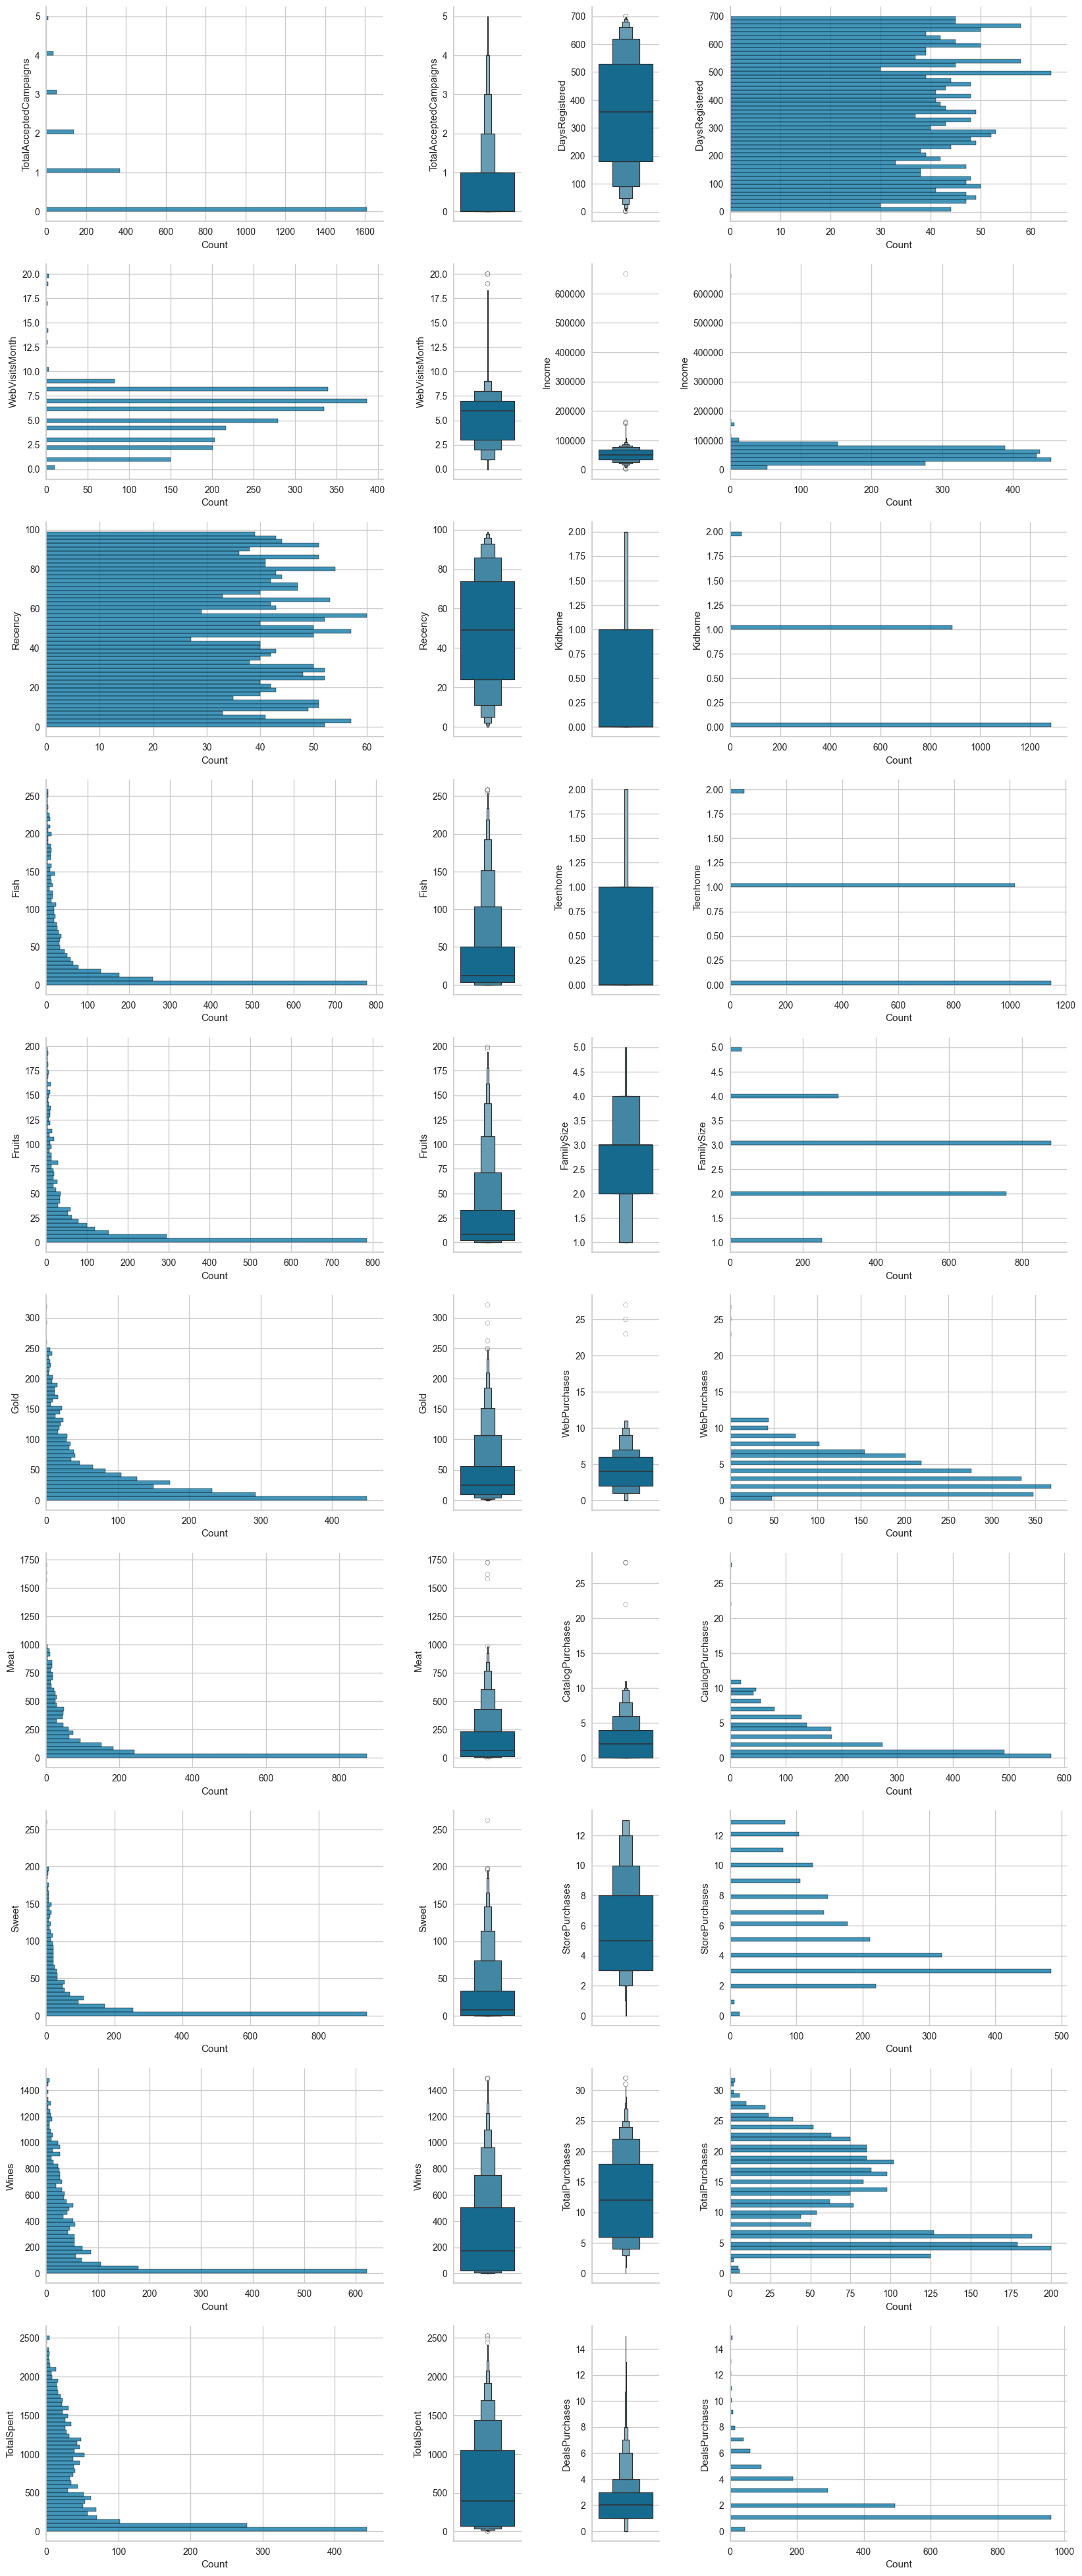

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = data_copy.describe(include=np.number).columns
half_amount = int(numerical_columns.shape[0]/2)

fig, axes = plt.subplots(
    nrows=half_amount,
    ncols=4,
    figsize=(20, half_amount*5),
    gridspec_kw={
        'width_ratios': [5, 1, 1, 5],
        'wspace': .35
    }
)

for pos, column in enumerate(iterable=numerical_columns):
    sns.histplot(
        y=data_copy[column],
        ax=axes[pos % half_amount, 0 if pos >= half_amount else 3],
        bins=50
    )

    sns.boxenplot(
        y=data_copy[column],
        ax=axes[pos % half_amount, 1 if pos >= half_amount else 2]
    )

    sns.despine()

### Menghilangkan Outlier

Berdasarkan analisis distribusi data menggunakan **histplot** dan **boxplot**, ditemukan bahwa kolom-kolom seperti `Income`, `CatalogPurchases`, `Meat`, dan `WebPurchases` memiliki nilai yang sangat ekstrem atau outlier, yang terlihat jelas pada visualisasi tersebut. Outlier ini dapat mempengaruhi statistik deskriptif, seperti rata-rata dan deviasi standar, serta dapat mengganggu performa model prediktif.

Sebagai contoh, pada kolom `Income`, nilai maksimum yang sangat jauh dari quantile3 terlihat jelas pada boxplot, menandakan adanya data yang tidak representatif atau sangat berbeda dari mayoritas data. Hal ini dapat menyebabkan ketidakseimbangan dalam analisis lebih lanjut.

Untuk itu, keputusan diambil untuk **menghilangkan outlier** dengan mengganti nilai yang melebihi batas atas (upper limit) dengan threshold yang dihitung berdasarkan interquantile range. Dengan demikian, kita dapat menjaga kualitas data dan memastikan bahwa analisis serta model yang dibangun lebih akurat dan tidak terdistorsi oleh nilai-nilai ekstrem.

In [140]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    return up_limit

def replace_with_threshold(dataframe, variable):
    up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

outlier_columns = ['Income', 'CatalogPurchases', 'Meat', 'WebPurchases']
dataframes = [data, data_copy]

for dataframe in dataframes:
    for variable in outlier_columns:
        replace_with_threshold(
            dataframe=dataframe,
            variable=variable
        )

## **Numerical Features Inspection**
### Uji Normalitas Menggunakan Uji Kolmogorov-Smirnov (KS Test)

Kode berikut ini melakukan uji Kolmogorov-Smirnov (KS) pada kolom numerik untuk memeriksa apakah data mengikuti distribusi normal. Uji ini membandingkan distribusi setiap kolom dengan distribusi normal yang memiliki mean dan standar deviasi yang sama. Berdasarkan nilai p, kita dapat menentukan apakah data mengikuti distribusi normal.

1. **Uji KS**: Uji KS diterapkan untuk membandingkan fungsi distribusi kumulatif empiris (ECDF) dari data dengan fungsi distribusi kumulatif (CDF) dari distribusi normal yang dihasilkan menggunakan mean dan standar deviasi dari data.
2. **Interpretasi Nilai P**: Jika nilai p lebih besar dari 0,05, kita anggap data mengikuti distribusi normal. Jika nilai p lebih kecil dari 0,05, data tidak mengikuti distribusi normal.

In [141]:
from scipy import stats

result = {
    'Column': [],
    'Statistic': [],
    'P-Value': [],
    'Normal Distribution': []
}

for column in numerical_columns:
    statistic, p_value = stats.kstest(
        rvs=data_copy[column],
        cdf=np.random.normal(
            data_copy[column].mean(),
            data_copy[column].std(),
            size=len(data_copy[column])
        )
    )

    result['Column'].append(column)
    result['Statistic'].append(statistic)
    result['P-Value'].append('> 0.05' if p_value > 0.05 else '< 0.05')
    result['Normal Distribution'].append(True if p_value > 0.05 else False)

pd.DataFrame(data=result)

,Column,Statistic,P-Value,Normal Distribution
0,DaysRegistered,0.078520,< 0.05,False
1,Income,0.051444,< 0.05,False
2,Kidhome,0.367329,< 0.05,False
3,Teenhome,0.342058,< 0.05,False
4,FamilySize,0.235560,< 0.05,False
5,WebPurchases,0.140794,< 0.05,False
6,CatalogPurchases,0.187726,< 0.05,False
7,StorePurchases,0.176444,< 0.05,False
8,TotalPurchases,0.139892,< 0.05,False
9,DealsPurchases,0.241426,< 0.05,False


Berdasarkan hasil uji Kolmogorov-Smirnov (KS) yang dilakukan pada kolom-kolom numerik, semua kolom menunjukkan p-value yang lebih kecil dari 0,05, yang mengindikasikan bahwa data pada setiap kolom **tidak mengikuti distribusi normal**.

### Uji Multikolinearitas Menggunakan Variance Inflation Factor (VIF)

Multikolinearitas dapat terjadi ketika dua atau lebih variabel independen saling berkorelasi tinggi, yang dapat mempengaruhi hasil regresi. Uji multikolinearitas ini dilakukan untuk mengetahui kolom-kolom mana yang memiliki variansi tinggi di dalam dataset, yang biasanya disebabkan oleh adanya korelasi antar kolom-kolom tersebut. Mengidentifikasi kolom dengan multikolinearitas tinggi adalah langkah awal yang penting dalam proses analisis data, karena multikolinearitas yang tinggi dapat mengganggu model analisis, terutama dalam regresi linier.

**Tujuan Utama:**
1. **Mengetahui Kolom dengan Variansi Tinggi**: Dengan menghitung Variance Inflation Factor (VIF), kita dapat mengidentifikasi kolom-kolom yang memiliki variansi tinggi karena korelasi yang kuat antar kolom. Kolom-kolom seperti ini dapat menyebabkan masalah dalam analisis lebih lanjut, terutama saat menggunakan model yang peka terhadap multikolinearitas, seperti regresi linier.
   
2. **Sebagai Filter Awal untuk Dimensionality Reduction**: Hasil uji VIF ini dapat digunakan sebagai filter awal sebelum memilih algoritma dimensionality reduction. Kolom-kolom dengan multikolinearitas tinggi dapat dipertimbangkan untuk dihapus atau digabungkan, karena mereka mungkin mengandung informasi yang sangat mirip. Dengan mengurangi dimensi dataset, kita dapat meningkatkan efisiensi dan akurasi algoritma pembelajaran mesin yang digunakan, seperti PCA (Principal Component Analysis) atau t-SNE (t-distributed Stochastic Neighbor Embedding).

3. **Menentukan Algoritma yang Tepat**: Berdasarkan hasil uji ini, kita dapat memilih algoritma dimensionality reduction yang sesuai. Jika kolom-kolom dengan VIF tinggi tetap ada, maka algoritma seperti PCA yang dapat mengatasi multikolinearitas akan lebih efektif untuk mereduksi dimensi data.

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
derived_num_columns = ['FamilySize', 'TotalSpent', 'TotalPurchases']
original_columns = [column for column in numerical_columns if column not in derived_num_columns]

vif = [
    variance_inflation_factor(
        exog=data_copy[original_columns].values, 
        exog_idx=column_index
    ) for column_index in range(len(original_columns))
]

multicollinearity_data = pd.DataFrame(
    data={        
        'Columns': original_columns,
        'VIF': vif,
        'Multicollinearity':['Not Correlated' if value < 5 else 'Relatively Correlated' if value < 10 else 'Highly Correlated' for value in vif]
    }
)

multicollinearity_data

,Columns,VIF,Multicollinearity
0,DaysRegistered,5.230758,Relatively Correlated
1,Income,15.028259,Highly Correlated
2,Kidhome,2.976911,Not Correlated
3,Teenhome,2.832547,Not Correlated
4,WebPurchases,6.342242,Relatively Correlated
5,CatalogPurchases,5.589997,Relatively Correlated
6,StorePurchases,9.186494,Relatively Correlated
7,DealsPurchases,4.029725,Not Correlated
8,TotalAcceptedCampaigns,1.851952,Not Correlated
9,WebVisitsMonth,8.641915,Relatively Correlated


## **Categorical Features Inspection**

Kemudian kita mencoba untuk menganalisis dan memvisualisasikan distribusi kolom yang memiliki fitur kategorik dalam dataset. Dengan menggunakan **barplot** dan **pie chart**, kita dapat memahami lebih baik tentang **jumlah data (count)** dan **proporsi** dari setiap kategori dalam setiap kolom kategorik.

- **Barplot** digunakan untuk menampilkan jumlah absolut setiap kategori.
- **Pie chart** digunakan untuk menunjukkan distribusi relatif atau proporsi masing-masing kategori dalam dataset.

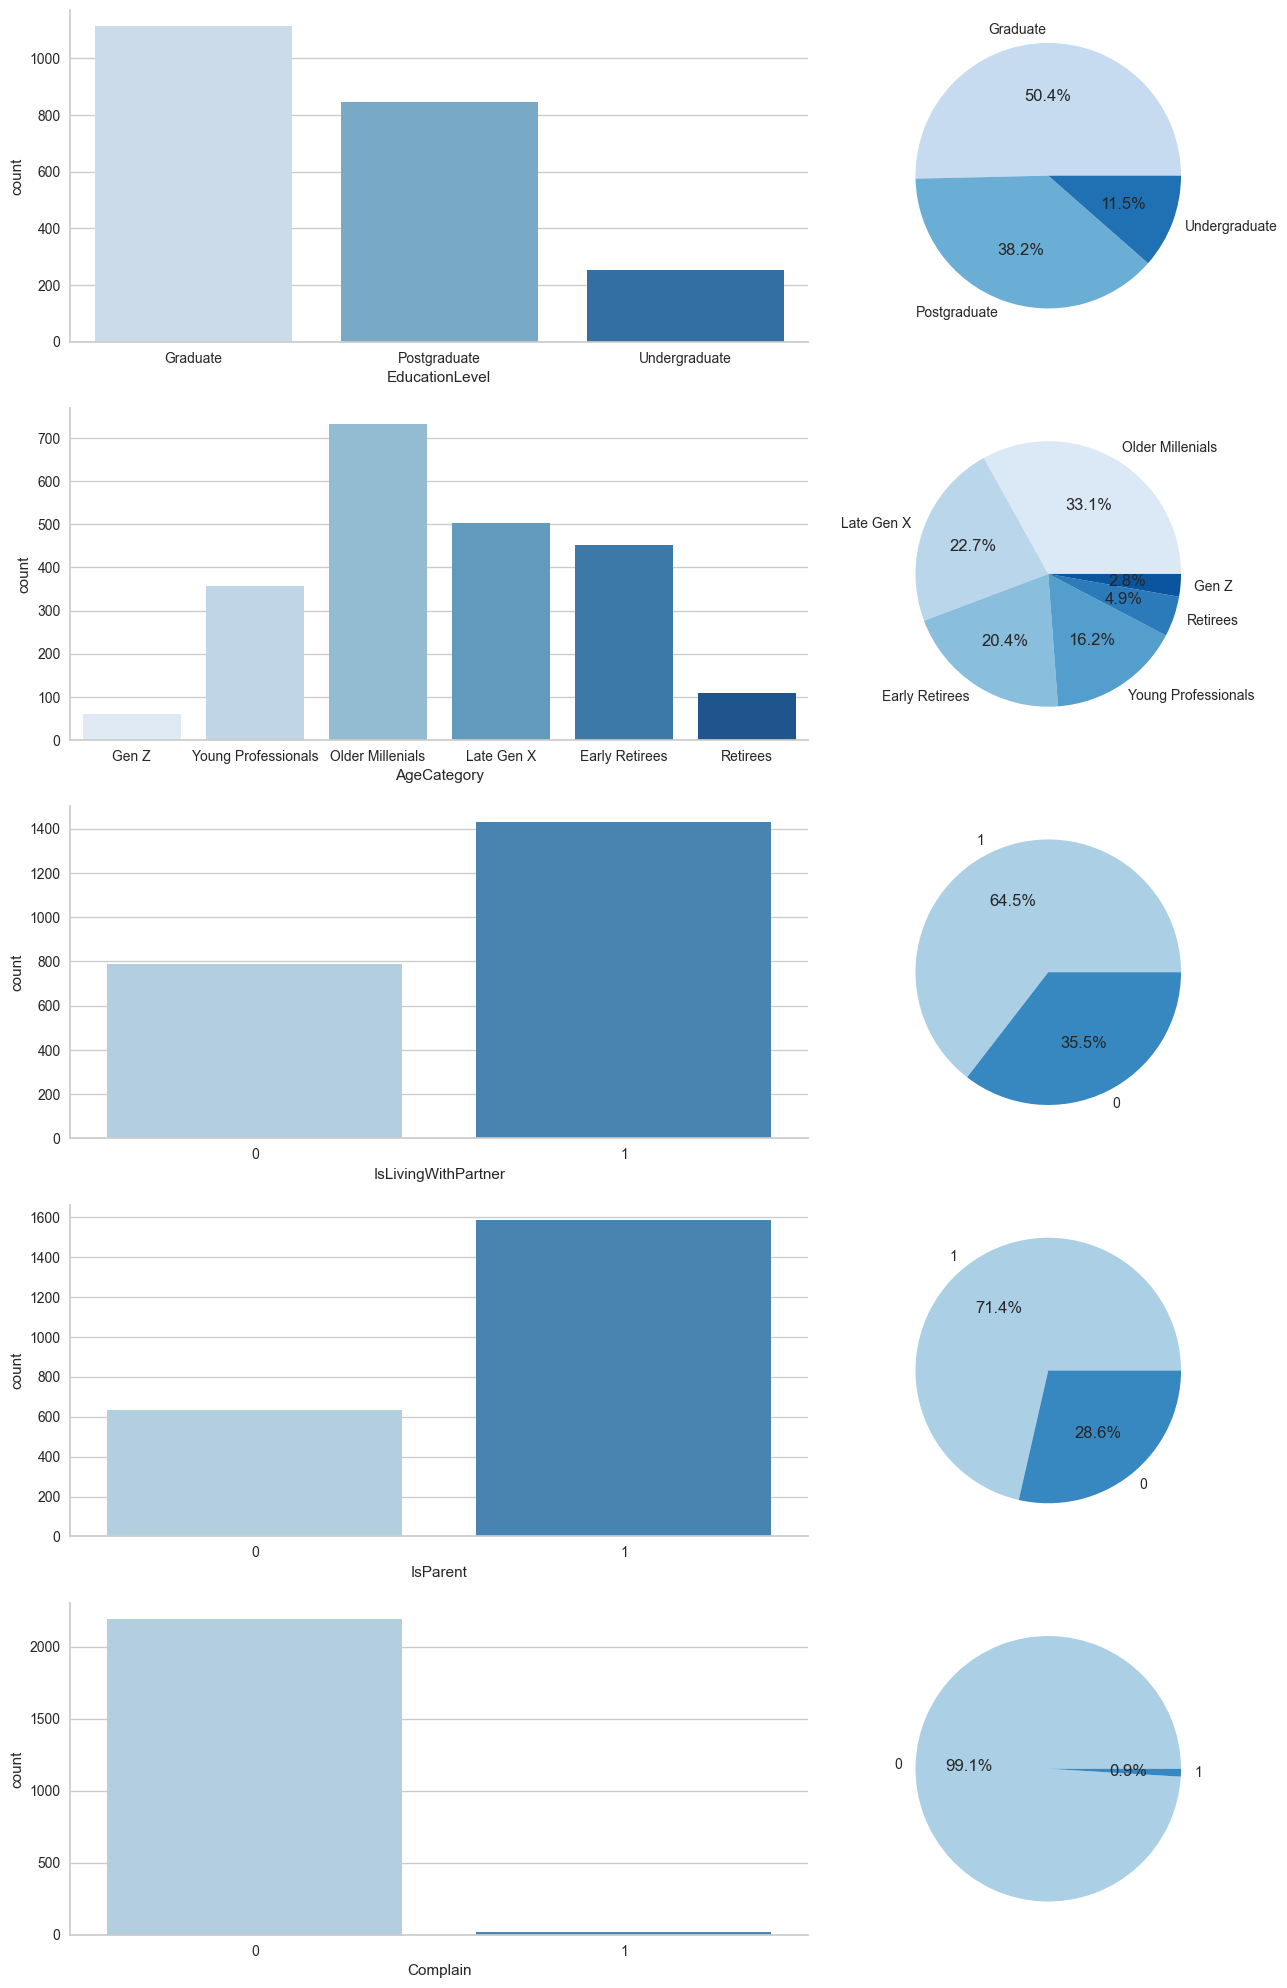

In [143]:
categorical_columns = data_copy.describe(include='category').columns

fig, axes = plt.subplots(
    nrows=categorical_columns.shape[0],
    ncols=2,
    figsize=(15, categorical_columns.shape[0]*5),
    gridspec_kw={
        'width_ratios': [2, 1],
        'wspace': .1
    }
)

for pos, column in enumerate(iterable=categorical_columns):
    aggregate = data_copy[column].value_counts()
    palette = sns.color_palette(
        palette='Blues',
        n_colors=data_copy[column].nunique()
    )

    sns.barplot(
        data=aggregate,
        palette='Blues',
        ax=axes[pos, 0]
    )

    axes[pos, 1].pie(
        x=aggregate,
        labels=aggregate.index,
        autopct='%.1f%%',
        colors=palette
    )

    sns.despine()

Fitur kategorik `EducationLevel` dan `AgeCategory` akan diinspeksi lebih lanjut untuk menguji signifikansi mereka terhadap fitur numerik yang memiliki nilai **Variance Inflation Factor (VIF)** tinggi. Hal ini akan dilakukan setelah proses korelasi antara fitur-fitur numerik dilakukan, untuk memastikan bahwa hanya fitur numerik yang relevan dengan multikolinearitas yang diperiksa lebih lanjut.

## **Analisis Korelasi**

Kode ini digunakan untuk menganalisis korelasi antar kolom numerik yang memiliki **multikolinearitas tinggi** dan menampilkan hasilnya dalam bentuk **heatmap**. Proses ini dilakukan setelah mengidentifikasi kolom-kolom dengan **Variance Inflation Factor (VIF)** tinggi yang menunjukkan adanya multikolinearitas, yang bisa mempengaruhi kestabilan model.

Metode **Spearman** dipilih untuk menghitung korelasi karena kolom-kolom numerik yang terlibat dalam analisis ini **tidak mengikuti distribusi Gaussian** (normal), seperti yang telah ditemukan pada bagian sebelumnya melalui uji normalitas menggunakan uji Kolmogorov-Smirnov. Korelasi Spearman mengukur kekuatan dan arah hubungan monotonic antara dua variabel, tanpa memerlukan asumsi distribusi normal pada data.

<Axes: >

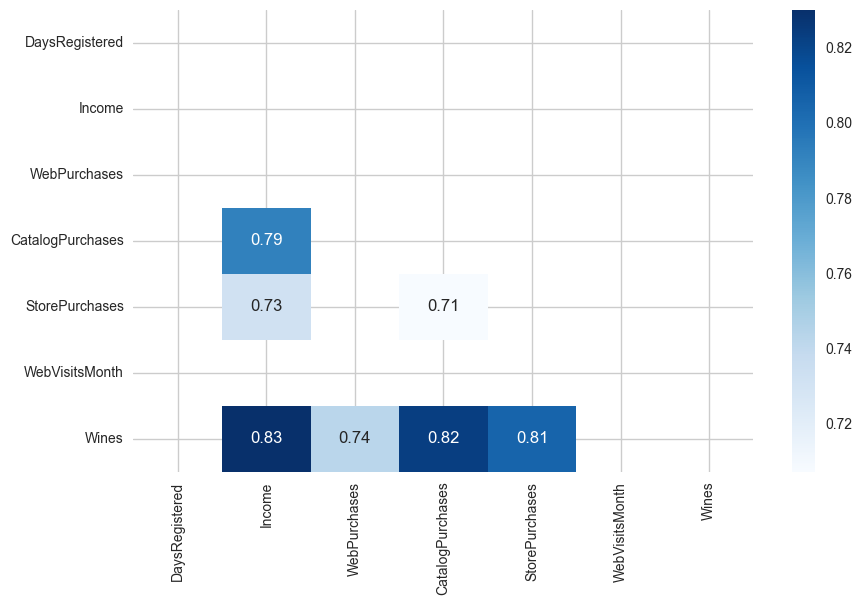

In [144]:
highly_variance_columns = multicollinearity_data[multicollinearity_data['Multicollinearity'] != 'Not Correlated']['Columns'].to_list()
numerical_correlation = data_copy[highly_variance_columns].corr(method='spearman')

plt.figure(figsize=(10,6))

trimask = np.triu(np.ones_like(numerical_correlation))

sns.heatmap(
    data=numerical_correlation,
    annot=True,
    mask=trimask|np.abs(numerical_correlation < .7),
    cmap='Blues',
    fmt='.2f'
)

## **Analisis Korelasi dan Uji Kruskal-Wallis**

Dalam analisis ini, ditemukan bahwa beberapa fitur numerik memiliki **korelasi tinggi** dengan nilai absolut lebih dari 0.7. Nilai korelasi ini digunakan sebagai **filter** untuk menentukan fitur-fitur numerik yang akan diuji lebih lanjut dengan menggunakan **uji Kruskal-Wallis** terhadap fitur-fitur kategorik.

### **Fitur yang Ditemukan dengan Korelasi Tinggi**:
Beberapa fitur numerik yang memiliki korelasi tinggi (lebih dari 0.7) antara satu sama lain, yang dapat menyebabkan multikolinearitas, adalah:
- **Income**
- **WebPurchases**
- **CatalogPurchases**
- **StorePurchases**
- **Wines**

Kolom-kolom ini akan diuji lebih lanjut untuk melihat apakah ada hubungan yang signifikan dengan fitur-fitur kategorik yang ada.

### **Fitur Kategorik yang Akan Diuji**:
Fitur-fitur kategorik yang akan digunakan dalam uji Kruskal-Wallis adalah:
- **EducationLevel**
- **AgeCategory**

### **Tujuan Uji Kruskal-Wallis**:
Uji **Kruskal-Wallis** digunakan untuk menguji apakah terdapat perbedaan yang signifikan antara dua atau lebih kelompok dari variabel kategorik terhadap variabel numerik. Uji ini dipilih karena:
1. **Tidak membutuhkan asumsi normalitas** pada data.
2. Memungkinkan kita untuk menguji perbedaan antara kategori pada variabel numerik yang distribusinya tidak normal, yang relevan dengan kondisi data dalam analisis ini.

In [145]:
from scipy.stats import kruskal

multinominal_columns = ['EducationLevel', 'AgeCategory']
intercorrelated_columns = ['Income', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'Wines']

for i in multinominal_columns:
    print(f'Kruskal-Wallis results for {i}:')

    for j in intercorrelated_columns:
        group = [data_copy[(data_copy[i] == category)][j] for category in data_copy[i].unique()]
        result = kruskal(*group)

        clause = [
            ['below','above'],
            ['significant','insignificant'],
            [' at least two categories ',' ']
        ]

        k = 0 if result.pvalue < 0.05 else 1

        print(
            f'- The p-value is {clause[0][k]} 0.05, indicating {clause[1][k]}',
            f'difference between{clause[2][k]}of the product',
            f'for {j} measurement.'
        )
    
    print('\n')

Kruskal-Wallis results for EducationLevel:
- The p-value is below 0.05, indicating significant difference between at least two categories of the product for Income measurement.
- The p-value is below 0.05, indicating significant difference between at least two categories of the product for WebPurchases measurement.
- The p-value is below 0.05, indicating significant difference between at least two categories of the product for CatalogPurchases measurement.
- The p-value is below 0.05, indicating significant difference between at least two categories of the product for StorePurchases measurement.
- The p-value is below 0.05, indicating significant difference between at least two categories of the product for Wines measurement.


Kruskal-Wallis results for AgeCategory:
- The p-value is below 0.05, indicating significant difference between at least two categories of the product for Income measurement.
- The p-value is below 0.05, indicating significant difference between at least two cate

Dari hasil uji Kruskal-Wallis pada fitur **EducationLevel** dan **AgeCategory**, didapatkan p-value yang **lebih kecil dari 0.05** untuk semua fitur numerik terkait, yaitu **Income**, **WebPurchases**, **CatalogPurchases**, **StorePurchases**, dan **Wines**. Artinya, ada **perbedaan yang signifikan** antara kategori-kategori dalam **EducationLevel** dan **AgeCategory** terhadap fitur-fitur numerik ini.

Perbedaan signifikan ini memberi gambaran bahwa kategori dalam **EducationLevel** dan **AgeCategory** berpengaruh terhadap nilai numerik dalam fitur-fitur tersebut. Hal ini penting untuk dipertimbangkan saat melakukan analisis lebih lanjut atau saat memilih fitur yang relevan untuk model prediktif.

## **Scaling**

Setelah menemukan adanya perbedaan signifikan antara kategori **EducationLevel** dan **AgeCategory** terhadap fitur numerik, langkah selanjutnya adalah melakukan **scaling** pada fitur numerik. Proses scaling ini bertujuan untuk menormalkan data sehingga semua fitur memiliki skala yang seragam, yang sangat penting saat kita melakukan analisis lebih lanjut.

Scaling diperlukan agar model atau metode statistik yang digunakan dapat bekerja dengan lebih efektif, terutama ketika fitur-fitur numerik memiliki rentang nilai yang sangat berbeda. Dengan melakukan scaling, kita dapat memastikan bahwa fitur dengan rentang nilai besar tidak mendominasi analisis, dan setiap fitur mendapatkan bobot yang seimbang.

In [146]:
data['EducationLevel'] = data['EducationLevel'].replace(
    to_replace={
        'Undergraduate': 0,
        'Graduate': 1,
        'Postgraduate': 2
    }
).astype(dtype=np.int32)

In [147]:
data['AgeCategory'] = data['AgeCategory'].replace(
    to_replace={
        'Gen Z': 0,
        'Young Professionals': 1,
        'Older Millenials': 2,
        'Late Gen X': 3, 
        'Early Retirees': 4,
        'Retirees': 5
    }
).astype(dtype=np.int32)

In [148]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data),
    columns=data.columns
)

scaled_data.head()

,DaysRegistered,EducationLevel,Income,AgeCategory,IsLivingWithPartner,IsParent,Kidhome,Teenhome,FamilySize,WebPurchases,...,WebVisitsMonth,Recency,Fish,Fruits,Gold,Meat,Sweet,Wines,TotalSpent,Complain
0,0.881089,0.0,0.203393,1.0,-1.0,-1.0,0.0,0.0,-2.0,1.00,...,0.25,0.18,3.404255,2.580645,1.351064,2.210405,2.50000,0.957380,1.246680,0.0
1,-0.694842,0.0,-0.151645,1.0,-1.0,0.0,1.0,1.0,0.0,-0.75,...,-0.25,-0.22,-0.212766,-0.225806,-0.393617,-0.286705,-0.21875,-0.339917,-0.377426,0.0
2,-0.124642,0.0,0.609034,0.5,0.0,-1.0,0.0,0.0,-1.0,1.00,...,-0.50,-0.46,2.106383,1.322581,0.372340,0.272832,0.40625,0.522869,0.387640,0.0
3,-0.620344,0.0,-0.744619,-0.5,0.0,0.0,1.0,0.0,0.0,-0.50,...,0.00,-0.46,-0.042553,-0.129032,-0.414894,-0.221965,-0.15625,-0.339917,-0.350868,0.0
4,-0.557307,1.0,0.208059,-0.5,0.0,0.0,1.0,0.0,0.0,0.25,...,-0.25,0.90,0.723404,1.129032,-0.202128,0.231214,0.59375,-0.003119,0.026047,0.0


## **Uji Linearitas**

Setelah scaling, langkah berikutnya adalah melakukan **uji linearitas** untuk melihat apakah terdapat hubungan linear antara fitur-fitur numerik yang berkorelasi tinggi. Jika hubungan tersebut menunjukkan sifat **linear** (dengan nilai **R-squared** yang mendekati 1), maka kita bisa melanjutkan dengan menggunakan **PCA (Principal Component Analysis)** sebagai metode untuk **dimensionality reduction**.

Namun, jika hasil uji menunjukkan bahwa hubungan tersebut **non-linear**, maka **t-SNE (t-Distributed Stochastic Neighbor Embedding)** akan digunakan untuk mengurangi dimensi dan memvisualisasikan data dalam bentuk yang lebih mudah dipahami.

Dengan pendekatan ini, kita dapat menentukan metode yang paling tepat untuk analisis lebih lanjut dan pengolahan data.

In [149]:
import statsmodels.api as sm

for column in intercorrelated_columns:
    X = scaled_data.drop(columns=[column])
    y = scaled_data[column]

    X = sm.add_constant(X)

    model = sm.OLS(
        endog=y,
        exog=X
    )

    print(model.fit().summary(), '\n')

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     286.0
Date:                Sun, 29 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:18:16   Log-Likelihood:                -714.72
No. Observations:                2216   AIC:                             1475.
Df Residuals:                    2193   BIC:                             1607.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Dari hasil analisis menggunakan **model OLS (Ordinary Least Squares)** yang diterapkan pada fitur-fitur numerik yang berkorelasi tinggi, diperoleh nilai **R-squared** yang hampir mendekati **1** untuk semua fitur yang diuji. Hal ini mengindikasikan adanya **hubungan linear yang sangat kuat** antara fitur-fitur numerik yang diuji.

Nilai **R-squared** yang mendekati 1 menunjukkan bahwa model OLS mampu menjelaskan sebagian besar variabilitas dalam data. Ini berarti hubungan antara variabel independen (fitur lainnya) dengan variabel dependen (fitur yang sedang diuji) bersifat sangat linear, dan sebagian besar informasi dalam data dapat dijelaskan oleh hubungan linear tersebut.

## **Dimentionality Reduction**

Karena hubungan antara fitur-fitur numerik menunjukkan sifat **linear**, maka langkah selanjutnya adalah menggunakan **PCA (Principal Component Analysis)** untuk **dimensionality reduction**. PCA akan membantu kita mengurangi jumlah dimensi (fitur) dengan tetap mempertahankan sebanyak mungkin informasi yang terkandung dalam data.

Dengan demikian, berdasarkan hasil uji linearitas ini, kita akan menggunakan **PCA** sebagai metode untuk mengurangi dimensi dan menyederhanakan analisis lebih lanjut.

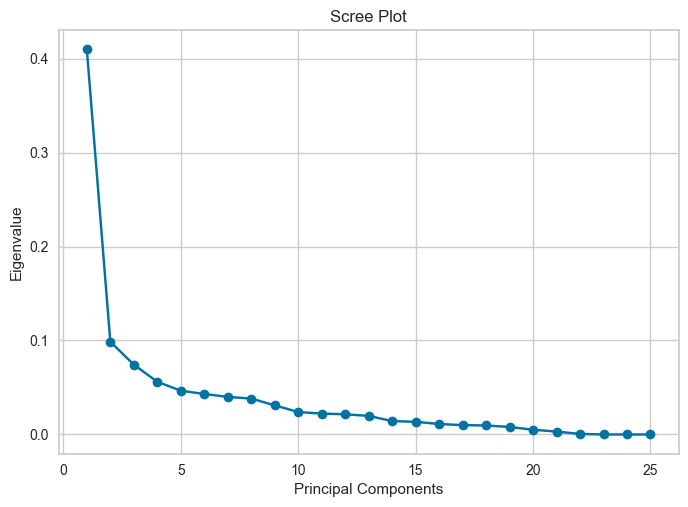

In [150]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
pca.fit(X=scaled_data)

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')
plt.show()

Setelah melakukan **PCA (Principal Component Analysis)**, kita dapat melihat hasil **Scree Plot** yang menggambarkan **eigenvalue** untuk masing-masing **principal components**. Grafik ini menunjukkan seberapa besar varians yang dapat dijelaskan oleh setiap komponen utama.

### Penjelasan Scree Plot:
- **Eigenvalue** pada setiap **principal component** menggambarkan kontribusi komponen tersebut terhadap varians data.
- Pada grafik tersebut, kita dapat melihat bahwa **principal components** dengan nilai **eigenvalue** di bawah **komponen ke-5** masih dapat menjelaskan sebagian besar **covariance** data.

### **Keputusan Penggunaan Principal Components**:
Dari **Scree Plot** yang diperoleh, terlihat bahwa **5 principal components pertama** sudah cukup **mampu menjelaskan sebagian besar varians** dalam data. Dengan demikian, kita dapat memilih **komponen-komponen utama** tersebut untuk digunakan dalam proses analisis selanjutnya, mengurangi dimensi data secara signifikan tanpa kehilangan informasi yang penting.

Pemilihan jumlah **principal components** yang lebih sedikit ini akan membantu dalam mengurangi kompleksitas model dan mempercepat proses analisis, sambil tetap mempertahankan informasi yang relevan. Dengan demikian kita memilih `n_components` sebesar 3 untuk memudahkan pula dalam melakukan visualisasi 3D.

In [151]:
dimensions = 2

pca = PCA(n_components=dimensions)
pca.fit(X=scaled_data)

PCA_data = pd.DataFrame(
    data=pca.transform(scaled_data),
    columns=[f'col{i}' for i in range(1, dimensions + 1)]
)

PCA_data.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-1.282568e-17,2.513600,-4.045435,-2.128437,-0.938418,1.950053,7.624048
col2,2216.0,4.168346e-17,1.233566,-2.634527,-0.902808,-0.236206,0.747424,5.473311
